# Ponder and Prove Spanning Trees
## Due: Saturday, 13 March 2021, 11:59 pm

## The Goal

The goal of this assignment is to investigate spanning trees of graphs.

Here is the example spanning tree you saw in your DPC:

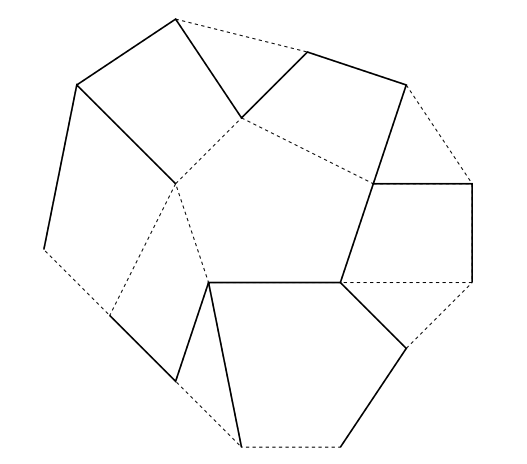

Wikipedia has a [Spanning Tree](https://en.wikipedia.org/wiki/Spanning_tree) page with useful information.

## Algorithm to Find a Spanning Tree

In five pseudocode steps:
1. Start with the "frontier" being a list of size one --- containing just the first node.
2. Pick a link connected to a node in the frontier that does not create a cycle --- that is, the other (destination) node of the link is not already in the frontier.
3. Add that destination node to the frontier unless already there.
4. Add the picked link to the spanning-tree.
5. Repeat steps 2-4 until all nodes are in the frontier.

## What to Create

1. A graph representation --- a way to represent both nodes and links.
2. A function that takes a graph and returns a list of its nodes.
3. A function that takes a graph and returns a list of its links.
4. A function that takes a graph and returns an adjacency list of nodes and links.
5. A function that takes a graph and a node and returns a list of adjacent nodes to that node.

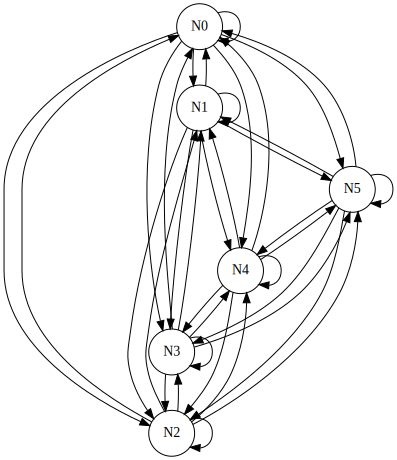

In [11]:
# 1. A graph representation --- a way to represent both nodes and links.
from graphviz import Source

graph1Dict = {'N0':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N1':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N2':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'],
              'N3':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N4':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N5':['N0', 'N1', 'N2', 'N3', 'N4', 'N5']}

# graph1Dict = {'N0':['N0 -> N0', 'N0 -> N1', 'N0 -> N2', 'N0 -> N3', 'N0 -> N4', 'N0 -> N5'], 'N1':['N1 -> N0', 'N1 -> N1', 'N1 -> N2', 'N1 -> N3', 'N1 -> N4', 'N1 -> N5'],
#               'N2':['N2 -> N0', 'N2 -> N1', 'N2 -> N2', 'N2 -> N3', 'N2 -> N4', 'N2 -> N5'], 'N3':['N3 -> N0', 'N3 -> N1', 'N3 -> N2', 'N3 -> N3', 'N3 -> N4', 'N3 -> N5'],
#               'N4':['N4 -> N0', 'N4 -> N1', 'N4 -> N2', 'N4 -> N3', 'N4 -> N4', 'N4 -> N5'], 'N5':['N5 -> N0', 'N5 -> N1', 'N5 -> N2', 'N5 -> N3', 'N5 -> N4', 'N5 -> N5']}

graph1 = '''
digraph {
  rankdir="DU"
  node [shape=circle]
  N0 [label="N0"]
  N1 [label="N1"]
  N2 [label="N2"]
  N3 [label="N3"]
  N4 [label="N4"]
  N5 [label="N5"]

  N0, N1, N2, N3, N4, N5 -> N0, N1, N2, N3, N4, N5
}
'''
Source(graph1)

In [18]:
# 2. A function that takes a graph and returns a list of its nodes.
def getNodes(graphDict):
  return list(graphDict.keys())


graphDict = {'N0':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N1':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N2':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'],
              'N3':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N4':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N5':['N0', 'N1', 'N2', 'N3', 'N4', 'N5']}

getNodes(graphDict)

['N0', 'N1', 'N2', 'N3', 'N4', 'N5']

In [36]:
# 3. A function that takes a graph and returns a list of its links.
def getLinks(graphDict):
  linkList = []
  for key in graphDict.keys():
    for link in graphDict[key]:
      linkList.append(key + ' -> ' + link)
  return linkList


graphDict = {'N0':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N1':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N2':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'],
              'N3':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N4':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N5':['N0', 'N1', 'N2', 'N3', 'N4', 'N5']}

getLinks(graphDict)

['N0 -> N0',
 'N0 -> N1',
 'N0 -> N2',
 'N0 -> N3',
 'N0 -> N4',
 'N0 -> N5',
 'N1 -> N0',
 'N1 -> N1',
 'N1 -> N2',
 'N1 -> N3',
 'N1 -> N4',
 'N1 -> N5',
 'N2 -> N0',
 'N2 -> N1',
 'N2 -> N2',
 'N2 -> N3',
 'N2 -> N4',
 'N2 -> N5',
 'N3 -> N0',
 'N3 -> N1',
 'N3 -> N2',
 'N3 -> N3',
 'N3 -> N4',
 'N3 -> N5',
 'N4 -> N0',
 'N4 -> N1',
 'N4 -> N2',
 'N4 -> N3',
 'N4 -> N4',
 'N4 -> N5',
 'N5 -> N0',
 'N5 -> N1',
 'N5 -> N2',
 'N5 -> N3',
 'N5 -> N4',
 'N5 -> N5']

In [39]:
# 4. A function that takes a graph and returns an adjacency list of nodes and links.
def getAdjacentNodes(graphDict):
  nodeList = []
  for key in graphDict:
    tempString = 'Node ' + key + ' is adjecent to nodes: ['
    for node in graphDict[key]:
      tempString += node + ', '
    nodeList.append(tempString[:-2] + ']')
  
  linkList = []
  for link in getLinks(graphDict):
    tempString = 'Link ' + link + ' is adjecent to nodes: ['
    for tempLink in getLinks(graphDict):
      if link[:2] == tempLink[:2] or link[-2:] == tempLink[-2:] or link[:2] == tempLink[-2:] or link[-2:] == tempLink[:2]:
        tempString += tempLink + ', '
    linkList.append(tempString[:-2] + ']')


    adjacenyList = [nodeList, linkList]
    
  return adjacenyList


graphDict = {'N0':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N1':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N2':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'],
              'N3':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N4':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N5':['N0', 'N1', 'N2', 'N3', 'N4', 'N5']}
              
getAdjacentNodes(graphDict)

[['Node N0 is adjecent to nodes: [N0, N1, N2, N3, N4, N5]',
  'Node N1 is adjecent to nodes: [N0, N1, N2, N3, N4, N5]',
  'Node N2 is adjecent to nodes: [N0, N1, N2, N3, N4, N5]',
  'Node N3 is adjecent to nodes: [N0, N1, N2, N3, N4, N5]',
  'Node N4 is adjecent to nodes: [N0, N1, N2, N3, N4, N5]',
  'Node N5 is adjecent to nodes: [N0, N1, N2, N3, N4, N5]'],
 ['Link N0 -> N0 is adjecent to nodes: [N0 -> N0, N0 -> N1, N0 -> N2, N0 -> N3, N0 -> N4, N0 -> N5, N1 -> N0, N2 -> N0, N3 -> N0, N4 -> N0, N5 -> N0]',
  'Link N0 -> N1 is adjecent to nodes: [N0 -> N0, N0 -> N1, N0 -> N2, N0 -> N3, N0 -> N4, N0 -> N5, N1 -> N0, N1 -> N1, N1 -> N2, N1 -> N3, N1 -> N4, N1 -> N5, N2 -> N0, N2 -> N1, N3 -> N0, N3 -> N1, N4 -> N0, N4 -> N1, N5 -> N0, N5 -> N1]',
  'Link N0 -> N2 is adjecent to nodes: [N0 -> N0, N0 -> N1, N0 -> N2, N0 -> N3, N0 -> N4, N0 -> N5, N1 -> N0, N1 -> N2, N2 -> N0, N2 -> N1, N2 -> N2, N2 -> N3, N2 -> N4, N2 -> N5, N3 -> N0, N3 -> N2, N4 -> N0, N4 -> N2, N5 -> N0, N5 -> N2]',
  '

In [40]:
# 5. A function that takes a graph and a node and returns a list of adjacent nodes to that node.

def returnAdjacentToNode(node, graphDict):
  return graphDict[node]

graphDict = {'N0':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N1':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N2':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'],
              'N3':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N4':['N0', 'N1', 'N2', 'N3', 'N4', 'N5'], 'N5':['N0', 'N1', 'N2', 'N3', 'N4', 'N5']}
node = 'N0'
returnAdjacentToNode(node, graphDict)

['N0', 'N1', 'N2', 'N3', 'N4', 'N5']

My attempt

In [136]:
def oldCreateSpanningTree(graphDict):
  # for nodes in graph
    # if node not used
      # for nodes left
        # if end reached append path


def popcorn(xList, yList):
  for i in xList:
    if i in yList: 
      yList.remove(i)
  return yList


def createSpanningTrees(graphDict):
  treeList = []
  for i in range(len(graphDict.keys())):
    node = list(graphDict.keys())[i]
    pathList = [[node]]

    for j in pathList:
      tempPathList = []
      # append all possible nodes that arent in path
      possiblePaths = popcorn(j, graphDict[j[-1]]) # current node in path
      # print(j, possiblePaths)
      if len(possiblePaths) > 0:
        for k in possiblePaths:
          tempList = j.copy()
          tempList.append(k)
          tempPathList.append(tempList)
        pathList += tempPathList
      tempJ = j
    treeList += pathList
                        
  return treeList


graphDict = {'N0': ['N1', 'N3'], 'N1': ['N0', 'N2'], 'N2': ['N1', 'N3'], 'N3': ['N0', 'N2']}
createSpanningTrees(graphDict)

[['N0'],
 ['N0', 'N1'],
 ['N0', 'N3'],
 ['N0', 'N1', 'N2'],
 ['N0', 'N3', 'N2'],
 ['N0', 'N1', 'N2', 'N3'],
 ['N1'],
 ['N1', 'N2'],
 ['N2'],
 ['N3']]

Code from https://www.geeksforgeeks.org/kruskals-minimum-spanning-tree-algorithm-greedy-algo-2/

In [137]:
# Python program for Kruskal's algorithm to find
# Minimum Spanning Tree of a given connected,
# undirected and weighted graph
 
from collections import defaultdict
 
# Class to represent a graph
 
 
class Graph:
 
    def __init__(self, vertices):
        self.V = vertices  # No. of vertices
        self.graph = []  # default dictionary
        # to store graph
 
    # function to add an edge to graph
    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])
 
    # A utility function to find set of an element i
    # (uses path compression technique)
    def find(self, parent, i):
        if parent[i] == i:
            return i
        return self.find(parent, parent[i])
 
    # A function that does union of two sets of x and y
    # (uses union by rank)
    def union(self, parent, rank, x, y):
        xroot = self.find(parent, x)
        yroot = self.find(parent, y)
 
        # Attach smaller rank tree under root of
        # high rank tree (Union by Rank)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
 
        # If ranks are same, then make one as root
        # and increment its rank by one
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
 
    # The main function to construct MST using Kruskal's
        # algorithm
    def KruskalMST(self):
 
        result = []  # This will store the resultant MST
         
        # An index variable, used for sorted edges
        i = 0
         
        # An index variable, used for result[]
        e = 0
 
        # Step 1:  Sort all the edges in
        # non-decreasing order of their
        # weight.  If we are not allowed to change the
        # given graph, we can create a copy of graph
        self.graph = sorted(self.graph,
                            key=lambda item: item[2])
 
        parent = []
        rank = []
 
        # Create V subsets with single elements
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
 
        # Number of edges to be taken is equal to V-1
        while e < self.V - 1:
 
            # Step 2: Pick the smallest edge and increment
            # the index for next iteration
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)
 
            # If including this edge does't
            #  cause cycle, include it in result
            #  and increment the indexof result
            # for next edge
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)
            # Else discard the edge
 
        minimumCost = 0
        print ("Edges in the constructed MST")
        for u, v, weight in result:
            minimumCost += weight
            print("%d -- %d == %d" % (u, v, weight))
        print("Minimum Spanning Tree" , minimumCost)
 
# Driver code
g = Graph(4)
g.addEdge(0, 1, 10)
g.addEdge(0, 2, 6)
g.addEdge(0, 3, 5)
g.addEdge(1, 3, 15)
g.addEdge(2, 3, 4)
 
# Function call
g.KruskalMST()
 
# This code is contributed by Neelam Yadav


Edges in the constructed MST
2 -- 3 == 4
0 -- 3 == 5
0 -- 1 == 10
Minimum Spanning Tree 19


## Test Your Code

You will need several different types of graphs (including ladder graphs) with which to test your algorithm.


See the self-assessment for specifics.

Edges in the constructed MST
0 -- 1 == 1
1 -- 2 == 1
2 -- 3 == 1
Minimum Spanning Tree 3


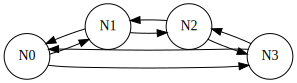

In [138]:
twoRungLadderGraph = '''
digraph {
  rankdir="LR"
  node [shape=circle]
  N0 [label="N0"]
  N1 [label="N1"]
  N2 [label="N2"]
  N3 [label="N3"]

  N1, N3 -> N0
  N0, N2 -> N1
  N1, N3 -> N2
  N0, N2 -> N3
}
'''

# twoRungLadderGraphDict = {'N0': ['N1', 'N3'], 'N1': ['N0', 'N2'], 'N2': ['N1', 'N3'], 'N3': ['N0', 'N2']}
# print(createSpanningTrees(twoRungLadderGraphDict))

g = Graph(4)
g.addEdge(0, 1, 1)
g.addEdge(1, 2, 1)
g.addEdge(2, 3, 1)
g.addEdge(3, 0, 1)
 
# Function call
g.KruskalMST()

Source(twoRungLadderGraph)

Edges in the constructed MST
0 -- 1 == 1
1 -- 2 == 1
2 -- 3 == 1
2 -- 4 == 1
4 -- 5 == 1
Minimum Spanning Tree 5


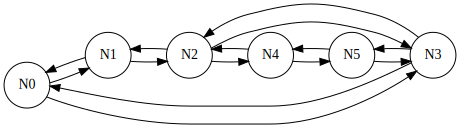

In [144]:
threeRungLadderGraph = '''
digraph {
  rankdir="LR"
  node [shape=circle]
  N0 [label="N0"]
  N1 [label="N1"]
  N2 [label="N2"]
  N3 [label="N3"]
  N4 [label="N4"]
  N5 [label="N5"]

  N1, N3 -> N0
  N0, N2 -> N1
  N1, N3, N4 -> N2
  N0, N2, N5 -> N3
  N2, N5 -> N4
  N3, N4 -> N5
}
'''

g = Graph(6)
g.addEdge(0, 1, 1)
g.addEdge(1, 2, 1)
g.addEdge(2, 3, 1)
g.addEdge(3, 0, 1)
g.addEdge(2, 4, 1)
g.addEdge(4, 5, 1)
g.addEdge(5, 3, 1)
 
# Function call
g.KruskalMST()

Source(threeRungLadderGraph)

Edges in the constructed MST
0 -- 1 == 1
1 -- 2 == 1
2 -- 3 == 1
2 -- 4 == 1
4 -- 5 == 1
4 -- 6 == 1
6 -- 7 == 1
Minimum Spanning Tree 7


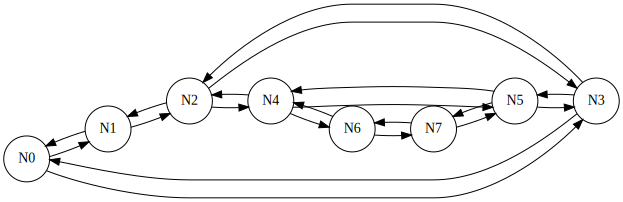

In [151]:
fourRungLadderGraph = '''
digraph {
  rankdir="LR"
  node [shape=circle]
  N0 [label="N0"]
  N1 [label="N1"]
  N2 [label="N2"]
  N3 [label="N3"]
  N4 [label="N4"]
  N5 [label="N5"]
  N6 [label="N6"]
  N7 [label="N7"]

  N1, N3 -> N0
  N0, N2 -> N1
  N1, N3, N4 -> N2
  N0, N2, N5 -> N3
  N2, N5, N6 -> N4
  N3, N4, N7 -> N5
  N4, N7 -> N6
  N5, N6 -> N7
}
'''

g = Graph(8)
g.addEdge(0, 1, 1)
g.addEdge(1, 2, 1)
g.addEdge(2, 3, 1)
g.addEdge(3, 0, 1)
g.addEdge(2, 4, 1)
g.addEdge(4, 5, 1)
g.addEdge(5, 3, 1)
g.addEdge(4, 6, 1)
g.addEdge(6, 7, 1)
g.addEdge(7, 5, 1)
 
# Function call
g.KruskalMST()

Source(fourRungLadderGraph)

Edges in the constructed MST
0 -- 1 == 1
1 -- 2 == 1
2 -- 3 == 1
2 -- 4 == 1
4 -- 5 == 1
4 -- 6 == 1
6 -- 7 == 1
6 -- 8 == 1
8 -- 9 == 1
Minimum Spanning Tree 9


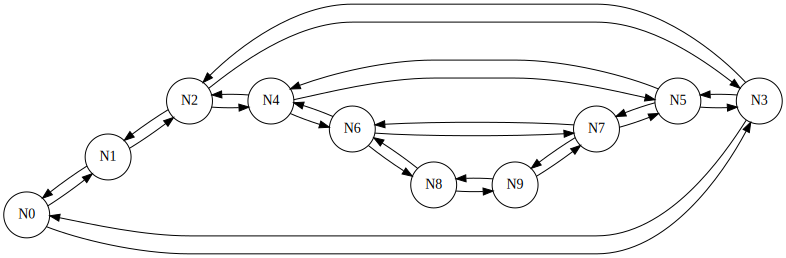

In [155]:
fiveRungLadderGraph = '''
digraph {
  rankdir="LR"
  node [shape=circle]
  N0 [label="N0"]
  N1 [label="N1"]
  N2 [label="N2"]
  N3 [label="N3"]
  N4 [label="N4"]
  N5 [label="N5"]
  N6 [label="N6"]
  N7 [label="N7"]
  N8 [label="N8"]
  N9 [label="N9"]

  N1, N3 -> N0
  N0, N2 -> N1
  N1, N3, N4 -> N2
  N0, N2, N5 -> N3
  N2, N5, N6 -> N4
  N3, N4, N7 -> N5
  N4, N7, N8 -> N6
  N5, N6, N9 -> N7
  N6, N9 -> N8
  N8, N7 -> N9
}
'''

g = Graph(10)
g.addEdge(0, 1, 1)
g.addEdge(1, 2, 1)
g.addEdge(2, 3, 1)
g.addEdge(3, 0, 1)
g.addEdge(2, 4, 1)
g.addEdge(4, 5, 1)
g.addEdge(5, 3, 1)
g.addEdge(4, 6, 1)
g.addEdge(6, 7, 1)
g.addEdge(7, 5, 1)
g.addEdge(6, 8, 1)
g.addEdge(8, 9, 1)
g.addEdge(9, 7, 1)
 
# Function call
g.KruskalMST()

Source(fiveRungLadderGraph)

In [158]:
# Based on Graph on Top

g = Graph(17)
g.addEdge(1, 2, 1)
g.addEdge(1, 7, 1)
g.addEdge(1, 5, 1)
g.addEdge(2, 3, 1)
g.addEdge(2, 8, 1)
g.addEdge(3, 4, 1)
g.addEdge(3, 8, 1)
g.addEdge(4, 9, 1)
g.addEdge(4, 10, 1)
g.addEdge(5, 6, 1)
g.addEdge(6, 7, 1)
g.addEdge(6, 15, 1)
g.addEdge(7, 8, 1)
g.addEdge(7, 11, 1)
g.addEdge(8, 9, 1)
g.addEdge(9, 10, 1)
g.addEdge(9, 12, 1)
g.addEdge(10, 13, 1)
g.addEdge(11, 12, 1)
g.addEdge(11, 14, 1)
g.addEdge(11, 15, 1)
g.addEdge(12, 13, 1)
g.addEdge(12, 16, 1)
g.addEdge(13, 16, 1)
g.addEdge(14, 15, 1)
g.addEdge(16, 0, 1)

# Function call
g.KruskalMST()

Edges in the constructed MST
1 -- 2 == 1
1 -- 7 == 1
1 -- 5 == 1
2 -- 3 == 1
2 -- 8 == 1
3 -- 4 == 1
4 -- 9 == 1
4 -- 10 == 1
5 -- 6 == 1
6 -- 15 == 1
7 -- 11 == 1
9 -- 12 == 1
10 -- 13 == 1
11 -- 14 == 1
12 -- 16 == 1
16 -- 0 == 1
Minimum Spanning Tree 16


In [159]:
# tenRungLadderGraph

g = Graph(20)
g.addEdge(0, 1, 1)
g.addEdge(1, 2, 1)
g.addEdge(2, 3, 1)
g.addEdge(3, 0, 1)
g.addEdge(2, 4, 1)
g.addEdge(4, 5, 1)
g.addEdge(5, 3, 1)
g.addEdge(4, 6, 1)
g.addEdge(6, 7, 1)
g.addEdge(7, 5, 1)
g.addEdge(6, 8, 1)
g.addEdge(8, 9, 1)
g.addEdge(9, 7, 1)
g.addEdge(8, 10, 1)
g.addEdge(10, 11, 1)
g.addEdge(11, 9, 1)
g.addEdge(10, 12, 1)
g.addEdge(12, 13, 1)
g.addEdge(13, 11, 1)
g.addEdge(12, 14, 1)
g.addEdge(14, 15, 1)
g.addEdge(15, 13, 1)
g.addEdge(14, 16, 1)
g.addEdge(16, 17, 1)
g.addEdge(17, 15, 1)
g.addEdge(16, 18, 1)
g.addEdge(18, 19, 1)
g.addEdge(19, 17, 1)

# Function call
g.KruskalMST()

Edges in the constructed MST
0 -- 1 == 1
1 -- 2 == 1
2 -- 3 == 1
2 -- 4 == 1
4 -- 5 == 1
4 -- 6 == 1
6 -- 7 == 1
6 -- 8 == 1
8 -- 9 == 1
8 -- 10 == 1
10 -- 11 == 1
10 -- 12 == 1
12 -- 13 == 1
12 -- 14 == 1
14 -- 15 == 1
14 -- 16 == 1
16 -- 17 == 1
16 -- 18 == 1
18 -- 19 == 1
Minimum Spanning Tree 19


In [163]:
# fourteenRungLadderGraph

g = Graph(28)
g.addEdge(0, 1, 1)
g.addEdge(1, 2, 1)
g.addEdge(2, 3, 1)
g.addEdge(3, 0, 1)
g.addEdge(2, 4, 1)
g.addEdge(4, 5, 1)
g.addEdge(5, 3, 1)
g.addEdge(4, 6, 1)
g.addEdge(6, 7, 1)
g.addEdge(7, 5, 1)
g.addEdge(6, 8, 1)
g.addEdge(8, 9, 1)
g.addEdge(9, 7, 1)
g.addEdge(8, 10, 1)
g.addEdge(10, 11, 1)
g.addEdge(11, 9, 1)
g.addEdge(10, 12, 1)
g.addEdge(12, 13, 1)
g.addEdge(13, 11, 1)
g.addEdge(12, 14, 1)
g.addEdge(14, 15, 1)
g.addEdge(15, 13, 1)
g.addEdge(14, 16, 1)
g.addEdge(16, 17, 1)
g.addEdge(17, 15, 1)
g.addEdge(16, 18, 1)
g.addEdge(18, 19, 1)
g.addEdge(19, 17, 1)
g.addEdge(18, 20, 1)
g.addEdge(20, 21, 1)
g.addEdge(21, 19, 1)
g.addEdge(20, 22, 1)
g.addEdge(22, 23, 1)
g.addEdge(23, 21, 1)
g.addEdge(22, 24, 1)
g.addEdge(24, 25, 1)
g.addEdge(25, 23, 1)
g.addEdge(24, 26, 1)
g.addEdge(26, 27, 1)
g.addEdge(27, 25, 1)

# Function call
g.KruskalMST()

Edges in the constructed MST
0 -- 1 == 1
1 -- 2 == 1
2 -- 3 == 1
2 -- 4 == 1
4 -- 5 == 1
4 -- 6 == 1
6 -- 7 == 1
6 -- 8 == 1
8 -- 9 == 1
8 -- 10 == 1
10 -- 11 == 1
10 -- 12 == 1
12 -- 13 == 1
12 -- 14 == 1
14 -- 15 == 1
14 -- 16 == 1
16 -- 17 == 1
16 -- 18 == 1
18 -- 19 == 1
18 -- 20 == 1
20 -- 21 == 1
20 -- 22 == 1
22 -- 23 == 1
22 -- 24 == 1
24 -- 25 == 1
24 -- 26 == 1
26 -- 27 == 1
Minimum Spanning Tree 27


In [164]:
# fifteenRungLadderGraph

g = Graph(30)
g.addEdge(0, 1, 1)
g.addEdge(1, 2, 1)
g.addEdge(2, 3, 1)
g.addEdge(3, 0, 1)
g.addEdge(2, 4, 1)
g.addEdge(4, 5, 1)
g.addEdge(5, 3, 1)
g.addEdge(4, 6, 1)
g.addEdge(6, 7, 1)
g.addEdge(7, 5, 1)
g.addEdge(6, 8, 1)
g.addEdge(8, 9, 1)
g.addEdge(9, 7, 1)
g.addEdge(8, 10, 1)
g.addEdge(10, 11, 1)
g.addEdge(11, 9, 1)
g.addEdge(10, 12, 1)
g.addEdge(12, 13, 1)
g.addEdge(13, 11, 1)
g.addEdge(12, 14, 1)
g.addEdge(14, 15, 1)
g.addEdge(15, 13, 1)
g.addEdge(14, 16, 1)
g.addEdge(16, 17, 1)
g.addEdge(17, 15, 1)
g.addEdge(16, 18, 1)
g.addEdge(18, 19, 1)
g.addEdge(19, 17, 1)
g.addEdge(18, 20, 1)
g.addEdge(20, 21, 1)
g.addEdge(21, 19, 1)
g.addEdge(20, 22, 1)
g.addEdge(22, 23, 1)
g.addEdge(23, 21, 1)
g.addEdge(22, 24, 1)
g.addEdge(24, 25, 1)
g.addEdge(25, 23, 1)
g.addEdge(24, 26, 1)
g.addEdge(26, 27, 1)
g.addEdge(27, 25, 1)
g.addEdge(26, 28, 1)
g.addEdge(28, 29, 1)
g.addEdge(29, 27, 1)

# Function call
g.KruskalMST()

Edges in the constructed MST
0 -- 1 == 1
1 -- 2 == 1
2 -- 3 == 1
2 -- 4 == 1
4 -- 5 == 1
4 -- 6 == 1
6 -- 7 == 1
6 -- 8 == 1
8 -- 9 == 1
8 -- 10 == 1
10 -- 11 == 1
10 -- 12 == 1
12 -- 13 == 1
12 -- 14 == 1
14 -- 15 == 1
14 -- 16 == 1
16 -- 17 == 1
16 -- 18 == 1
18 -- 19 == 1
18 -- 20 == 1
20 -- 21 == 1
20 -- 22 == 1
22 -- 23 == 1
22 -- 24 == 1
24 -- 25 == 1
24 -- 26 == 1
26 -- 27 == 1
26 -- 28 == 1
28 -- 29 == 1
Minimum Spanning Tree 29


In [165]:
# sixteenRungLadderGraph

g = Graph(32)
g.addEdge(0, 1, 1)
g.addEdge(1, 2, 1)
g.addEdge(2, 3, 1)
g.addEdge(3, 0, 1)
g.addEdge(2, 4, 1)
g.addEdge(4, 5, 1)
g.addEdge(5, 3, 1)
g.addEdge(4, 6, 1)
g.addEdge(6, 7, 1)
g.addEdge(7, 5, 1)
g.addEdge(6, 8, 1)
g.addEdge(8, 9, 1)
g.addEdge(9, 7, 1)
g.addEdge(8, 10, 1)
g.addEdge(10, 11, 1)
g.addEdge(11, 9, 1)
g.addEdge(10, 12, 1)
g.addEdge(12, 13, 1)
g.addEdge(13, 11, 1)
g.addEdge(12, 14, 1)
g.addEdge(14, 15, 1)
g.addEdge(15, 13, 1)
g.addEdge(14, 16, 1)
g.addEdge(16, 17, 1)
g.addEdge(17, 15, 1)
g.addEdge(16, 18, 1)
g.addEdge(18, 19, 1)
g.addEdge(19, 17, 1)
g.addEdge(18, 20, 1)
g.addEdge(20, 21, 1)
g.addEdge(21, 19, 1)
g.addEdge(20, 22, 1)
g.addEdge(22, 23, 1)
g.addEdge(23, 21, 1)
g.addEdge(22, 24, 1)
g.addEdge(24, 25, 1)
g.addEdge(25, 23, 1)
g.addEdge(24, 26, 1)
g.addEdge(26, 27, 1)
g.addEdge(27, 25, 1)
g.addEdge(26, 28, 1)
g.addEdge(28, 29, 1)
g.addEdge(29, 27, 1)
g.addEdge(28, 30, 1)
g.addEdge(30, 31, 1)
g.addEdge(31, 29, 1)

# Function call
g.KruskalMST()

Edges in the constructed MST
0 -- 1 == 1
1 -- 2 == 1
2 -- 3 == 1
2 -- 4 == 1
4 -- 5 == 1
4 -- 6 == 1
6 -- 7 == 1
6 -- 8 == 1
8 -- 9 == 1
8 -- 10 == 1
10 -- 11 == 1
10 -- 12 == 1
12 -- 13 == 1
12 -- 14 == 1
14 -- 15 == 1
14 -- 16 == 1
16 -- 17 == 1
16 -- 18 == 1
18 -- 19 == 1
18 -- 20 == 1
20 -- 21 == 1
20 -- 22 == 1
22 -- 23 == 1
22 -- 24 == 1
24 -- 25 == 1
24 -- 26 == 1
26 -- 27 == 1
26 -- 28 == 1
28 -- 29 == 1
28 -- 30 == 1
30 -- 31 == 1
Minimum Spanning Tree 31


In [166]:
# seventeenRungLadderGraph

g = Graph(34)
g.addEdge(0, 1, 1)
g.addEdge(1, 2, 1)
g.addEdge(2, 3, 1)
g.addEdge(3, 0, 1)
g.addEdge(2, 4, 1)
g.addEdge(4, 5, 1)
g.addEdge(5, 3, 1)
g.addEdge(4, 6, 1)
g.addEdge(6, 7, 1)
g.addEdge(7, 5, 1)
g.addEdge(6, 8, 1)
g.addEdge(8, 9, 1)
g.addEdge(9, 7, 1)
g.addEdge(8, 10, 1)
g.addEdge(10, 11, 1)
g.addEdge(11, 9, 1)
g.addEdge(10, 12, 1)
g.addEdge(12, 13, 1)
g.addEdge(13, 11, 1)
g.addEdge(12, 14, 1)
g.addEdge(14, 15, 1)
g.addEdge(15, 13, 1)
g.addEdge(14, 16, 1)
g.addEdge(16, 17, 1)
g.addEdge(17, 15, 1)
g.addEdge(16, 18, 1)
g.addEdge(18, 19, 1)
g.addEdge(19, 17, 1)
g.addEdge(18, 20, 1)
g.addEdge(20, 21, 1)
g.addEdge(21, 19, 1)
g.addEdge(20, 22, 1)
g.addEdge(22, 23, 1)
g.addEdge(23, 21, 1)
g.addEdge(22, 24, 1)
g.addEdge(24, 25, 1)
g.addEdge(25, 23, 1)
g.addEdge(24, 26, 1)
g.addEdge(26, 27, 1)
g.addEdge(27, 25, 1)
g.addEdge(26, 28, 1)
g.addEdge(28, 29, 1)
g.addEdge(29, 27, 1)
g.addEdge(28, 30, 1)
g.addEdge(30, 31, 1)
g.addEdge(31, 29, 1)
g.addEdge(30, 32, 1)
g.addEdge(32, 33, 1)
g.addEdge(33, 31, 1)

# Function call
g.KruskalMST()

Edges in the constructed MST
0 -- 1 == 1
1 -- 2 == 1
2 -- 3 == 1
2 -- 4 == 1
4 -- 5 == 1
4 -- 6 == 1
6 -- 7 == 1
6 -- 8 == 1
8 -- 9 == 1
8 -- 10 == 1
10 -- 11 == 1
10 -- 12 == 1
12 -- 13 == 1
12 -- 14 == 1
14 -- 15 == 1
14 -- 16 == 1
16 -- 17 == 1
16 -- 18 == 1
18 -- 19 == 1
18 -- 20 == 1
20 -- 21 == 1
20 -- 22 == 1
22 -- 23 == 1
22 -- 24 == 1
24 -- 25 == 1
24 -- 26 == 1
26 -- 27 == 1
26 -- 28 == 1
28 -- 29 == 1
28 -- 30 == 1
30 -- 31 == 1
30 -- 32 == 1
32 -- 33 == 1
Minimum Spanning Tree 33


# TODO My Report on What I Did and What I Learned

## Fun


I enjoyed looking at the differences in graphs and graph theory.  I enjoyed figuring out all the different operations.

## New

I learned more about adjaceny and more about how spanning trees work.

## Meaningful


Graph theory is meaningful because, when creating complex systems or formulas, we can use these to make an organized environment free of errors.

## Other

I had collaborated with Neelam Yadav from geeksforgeeks.org.  It is weird and makes you think in a differnt sort of way.  You have to look at the connections between everything.

# TODO What is True?
Click on each warranted checkbox to toggle it to True (or back to False). 

NOTE: *This only works in Colab. If you run it in some other Jupyter notebook client/server environment you may have to change False to True (or vice versa) manually.*

This self-assessment is subject to revision by a grader.

In [41]:
#@markdown ## What is True about what I did?
#@markdown ### I had fun.
cb00 = True #@param {type:'boolean'}
#@markdown ### I learned something new.
cb01 = True #@param {type:'boolean'}
#@markdown ### I achieved something meaningful, or something I can build upon at a later time.
cb02 = True #@param {type:'boolean'}
#@markdown ## What is True about my report?
#@markdown ### I wrote a sufficient number of well-written sentences.
cb03 = True #@param {type:'boolean'}
#@markdown ### My report is free of mechanical infelicities.
cb04 = True #@param {type:'boolean'}
#@markdown ### I used Grammarly (or something better described in my report) to check for MIs.
cb05 = True #@param {type:'boolean'}
#@markdown ### I reported on any connections I found between these problems and something I already know. 
cb06 = True #@param {type:'boolean'}
#@markdown ### I reported who were and what contribution each of my collaborators made.
cb07 = True #@param {type:'boolean'}
#@markdown ## What is True about my code?
#@markdown ### I created code to represent a graph as (at a bare minimum) a set of nodes and a set of links.
cb08 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its nodes.
cb09 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns a list of its links.
cb10 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and returns an adjacency list of nodes and links.
cb11 = True #@param {type:'boolean'}
#@markdown ### I wrote a function that takes a graph and a node and returns a list of adjacent nodes to that node.
cb12 = True #@param {type:'boolean'}
#@markdown ### I correctly implemented the spanning tree algorithm.
cb13 = True #@param {type:'boolean'}
#@markdown ## What is true about my testing?
#@markdown ### I created a ladder graph with 2 rungs and tested my code on it.
cb14 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 3 rungs and tested my code on it.
cb15 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 4 rungs and tested my code on it.
cb16 = True #@param {type:'boolean'}
#@markdown ### I created a ladder graph with 5 rungs and tested my code on it.
cb17 = True #@param {type:'boolean'}
#@markdown ### I created a graph from the example at the top of this notebook and tested my code on it.
cb18 = True #@param {type:'boolean'}
#@markdown ### I created three larger graphs (each with more than 20 nodes and more than 40 links) of my own devising and tested my code on it.
cb19 = True #@param {type:'boolean'}

## DO NOT CHANGE ANYTHING IN THE NEXT CODE CELL!!
### Delete this cell and the following ones before submitting your work.

In [ ]:
points_for_what_I_did = [5]*3
points_for_my_report = [8]*5
points_for_my_code = [5]*6
points_for_my_testing = [2]*4 + [3,4]
points = points_for_what_I_did + points_for_my_report + points_for_my_code + points_for_my_testing
# cb is short for checkbox
total = sum(map(lambda n, p: p if eval(f'cb{n:02}') else 0,
                range(len(points)), points))             
total

# For graders

In [ ]:
#@markdown ---
number_of_MIs_found = 0 #@param {type: 'slider', min: 0, max: 5}
#@markdown ---
